## Methodology
In this project we will find out the insights of current job market in Vietnam regarding Data Field 

In first step we have collected the required data from page https://careerbuilder.vn./ as one of the top ten recruitement pages in Vietnam. with the target on Data section, we just search "Data *", "Du lieu *", "Machine Learning *","AI", "phan tich"... to get data 

Second step in our analysis will be calculation and exploration of the insight of current Data job market in Vietnam + Text analyst to see which job title, city, company, location, job experience... that currently are popular in Vietnam 

In third one, we will build recommendation system to support users/readers on finding an appropriate jobs by many models being Contents - Consin Similarity, KNN, Navie Bayer, Logistics Regression... Then we can review the accuracy level and decide which one can be used it

Finally, some explaination, evaluation, and review what we can do further on this project

## Analysis 
### EDA 
In this section, we will utilize pandas and matplotlib to answer the following questions:

* What is the is the most common job title to appear when searching for 'Data *'?
* What is the most common industry that need more 'Data *'?
* What is the most common job type in data field ?
* What is the most job level in data field ?
* Which company hire the most Data Science job?
* From the data, which cities hire the most?

In [1]:
#Import library:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import pandas as pd
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('Final_Data_Career.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           4743 non-null   object
 1   Company         4743 non-null   object
 2   Type            4743 non-null   object
 3   Location        4743 non-null   object
 4   Salary          4743 non-null   object
 5   Level           4743 non-null   object
 6   Industry_re     4743 non-null   object
 7   Experience_re   4743 non-null   object
 8   Description_re  4743 non-null   object
 9   Requirement_re  4743 non-null   object
 10  Benefit_re      4743 non-null   object
dtypes: object(11)
memory usage: 407.7+ KB


#### Positions by Job Title
Since position titles are varied from one company to another, the following code block will categorize the titles into 5 groups: Data Scientist, Machine Learning , Data Analyst, Du lieu, & others 

In [3]:
df = data.copy()
df = df[df['Title'] != 'No Title'] 
df['Title']=[x.upper() for x in df['Title']]
df.loc[df['Title'].str.contains('SCIENTIST'), 'Title'] = 'Data Scientist'
df.loc[df['Title'].str.contains('DATA SCIENCE'),'Title']='Data Scientist'
df.loc[df['Title'].str.contains('ANALYTICS'),'Title']='Data Scientist'

df.loc[df['Title'].str.contains('DATA ENGINEER'),'Title']='Data Engineer' #include data/AI/Software
df.loc[df['Title'].str.contains('ARCHITECT'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('IT DATA'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('DATA MANAGER'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('DATA LAKE MANAGER'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('DATABASE'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('DATA WAREHOUSE'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('DATA MANAGEMENT'),'Title']='Data Engineer'
df.loc[df['Title'].str.contains('MINING'),'Title']='Data Engineer'

df.loc[df['Title'].str.contains('MACHINE'),'Title']='Machine Learning Engineer'
df.loc[df['Title'].str.contains('AI '),'Title']='Machine Learning Engineer'
df.loc[df['Title'].str.contains('PRODUCT'),'Title']='Machine Learning Engineer'
df.loc[df['Title'].str.contains('AUTOMATION'),'Title']='Machine Learning Engineer'
df.loc[df['Title'].str.contains('QR'),'Title']='Machine Learning Engineer'
df.loc[df['Title'].str.contains('OPTIMIZATION'),'Title']='Machine Learning Engineer'

df.loc[df['Title'].str.contains('DEVELOPER'),'Title']='Program Developer' #IT
df.loc[df['Title'].str.contains('FULLSTACK'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('PROGRAMMER'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('PROGRAMMING'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('SOFTWARE'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('BACKEND'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('BACK END'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('TESTER'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('DEV'),'Title']='Program Developer'
df.loc[df['Title'].str.contains('LINUX'),'Title']='Program Developer'

df.loc[df['Title'].str.contains('DESIGNER'),'Title']='Designer'
df.loc[df['Title'].str.contains('EDITOR'),'Title']='Designer'
df.loc[df['Title'].str.contains('PAINTING'),'Title']='Designer'
df.loc[df['Title'].str.contains('2D'),'Title']='Designer'
df.loc[df['Title'].str.contains('3D'),'Title']='Designer'
df.loc[df['Title'].str.contains('PD'),'Title']='Designer'
df.loc[df['Title'].str.contains('COPYWRITER'),'Title']='Designer'
df.loc[df['Title'].str.contains('QC'),'Title']='Designer'

df.loc[df['Title'].str.contains('MARKETING'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('DIGITAL'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('MEDIA'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('E-COMMERCE'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('SEO'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('CONTENT'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('TRADE'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('TELESALES '),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('SALES '),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('COMMERCIAL'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('RESEARCH'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('PLANNING'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('DEVELOPMENT'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('BRAND'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('STRATEGY'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('PLANNER'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('CREATIVE'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('TELEMARKETING'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('LAB'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('CAMPAIGN'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('EVENT'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('PRICING'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('R&D'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('MARKET'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('RETAIL'),'Title']='Marketing/Sales'
df.loc[df['Title'].str.contains('BUSINESS'),'Title']='Marketing/Sales'

df.loc[df['Title'].str.contains('ANALYST'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('BUSINESS DEVELOPMENT'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('ANALYSIS'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('INTELLIGENCE'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('STATISTICS'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('INPUT'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('ANALYTICAL'), 'Title'] = 'Data/Business Analyst'
df.loc[df['Title'].str.contains('REPORT'), 'Title'] = 'Data/Business Analyst'

df.loc[df['Title'].str.contains('CUSTOMER'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CARE'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CLAIM'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('COMPLIANCE'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CONSULTANTS'), 'Title'] = 'Customer Services/Operation' 
df.loc[df['Title'].str.contains('IMPORT'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('FACTORY'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('OPERATION'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('OFFICER'), 'Title'] = 'Customer Services/Operation' 
df.loc[df['Title'].str.contains('CALL'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('WAREHOUSE'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CLAIMER'), 'Title'] = 'Customer Services/Operation'  
df.loc[df['Title'].str.contains('COORDINATOR'), 'Title'] = 'Customer Services/Operation'  
df.loc[df['Title'].str.contains('PARTNERSHIP'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('STORE'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('OPS'), 'Title'] = 'Customer Services/Operation'  
df.loc[df['Title'].str.contains('PROCUMENT'), 'Title'] = 'Customer Services/Operation' 
df.loc[df['Title'].str.contains('RELATIONSHIP'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('COUNSELORS'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CONSULTANT'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CSKH'), 'Title'] = 'Customer Services/Operation'
df.loc[df['Title'].str.contains('CUSTOMER SERVICE'), 'Title'] = 'Customer Services/Operation'


df.loc[df['Title'].str.contains('TAX'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('ACCOUNTANT'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('FINANCE'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('SAP'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('INVOICE'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('LOAN'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('RISK'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('ACCOUNT'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('RECIEVABLE'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('PAYABLE'), 'Title'] = 'Finance/Accountant' 
df.loc[df['Title'].str.contains('ACCOUNTING'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('AUDITOR'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('CREDIT'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('APPROVAL'), 'Title'] = 'Finance/Accountant'
df.loc[df['Title'].str.contains('COSTING'), 'Title'] = 'Finance/Accountant'

df.loc[df['Title'].str.contains('IT'), 'Title'] = 'General Engineer/IT'
df.loc[df['Title'].str.contains('ENGINEER'),'Title']='General Engineer/IT'
df.loc[df['Title'].str.contains('TECHNICIAN'),'Title']='General Engineer/IT' 
df.loc[df['Title'].str.contains('TECHNICIAL'),'Title']='General Engineer/IT' 
df.loc[df['Title'].str.contains('INFORMATION'),'Title']='General Engineer/IT'  
df.loc[df['Title'].str.contains('INNOVATION'),'Title']='General Engineer/IT'
df.loc[df['Title'].str.contains('SYSTEM'),'Title']='General Engineer/IT'
df.loc[df['Title'].str.contains('MAINTENANCE'),'Title']='General Engineer/IT'

df.loc[df['Title'].str.contains('HR'),'Title']='HR' 
df.loc[df['Title'].str.contains('ADMIN'),'Title']='HR' 
df.loc[df['Title'].str.contains('RECRUITMENT'),'Title']='HR' 
df.loc[df['Title'].str.contains('AFFAIRS'),'Title']='HR'
df.loc[df['Title'].str.contains('TRAINING'),'Title']='HR'
df.loc[df['Title'].str.contains('TRAINEE'),'Title']='HR'
df.loc[df['Title'].str.contains('LEARNING'),'Title']='HR' 
df.loc[df['Title'].str.contains('PERSONNEL'),'Title']='HR'

df['Title']=df[(df['Title'] == 'Data Scientist') | (df['Title'] == 'Data/Business Analyst') | 
               (df['Title'] == 'Machine Learning Engineer') | (df['Title'] == 'Program Developer') |
               (df['Title'] == 'Data Engineer')|(df['Title'] == 'Designer')| (df['Title'] == 'Marketing/Sales')|(df['Title'] == 'Customer Services/Operation')|
              (df['Title'] == 'Finance/Accountant') |(df['Title'] == 'General Engineer/IT')|(df['Title'] == 'HR')]
df['Title']=['Others' if x is np.nan else x for x in df['Title']]

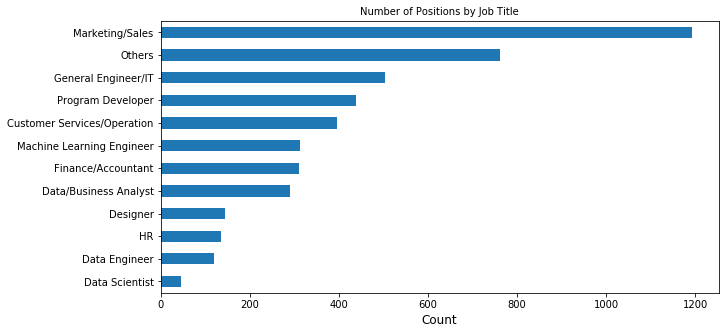

In [4]:
title = df.groupby(['Title']).count().sort_values('Company').tail(20)

title['Company'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 10)
plt.show()

Comment: It shows in the bar charts that the job title related to the sector of Marketing/Sales occupies that highest number of job requirement 

#### Positions by Companies 

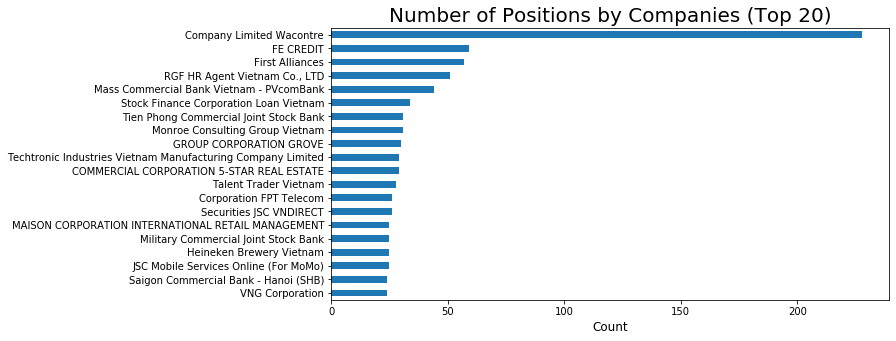

In [5]:
df_company = df[df['Company'] != 'No Name']
company = df_company.groupby(['Company']).count().sort_values('Title').tail(20)

company['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

From the chart, we can see that Wacontre having the highest demand for data jobs, follow by FE Credit, First Alliances, and HR Agent VN

#### Positions by Cities

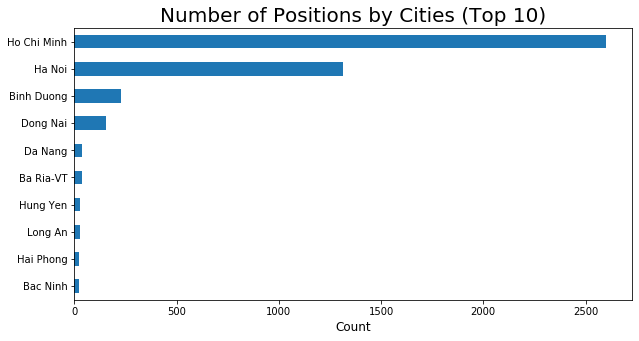

In [6]:
city = df.groupby(['Location']).count().sort_values('Title').tail(10)

city['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 10)', size = 20)
plt.show()


It appears that the top 5 cities that hire the most data jobs related job are HCM city, Hanoi, Binh Duong, Dong Nai, and Da Nang. It makes sense since those cities are the technology hub of the country.

#### Position by Industry

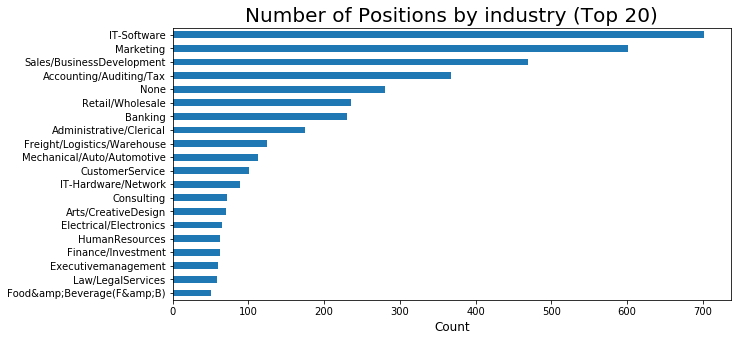

In [7]:
industry = df[df['Industry_re'].notnull()] 
industry = df.groupby(['Industry_re']).count().sort_values('Title').tail(20)
industry['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by industry (Top 20)', size = 20)
plt.show()

Comment: we can see that top 3 industries that required data most being IT/Software, Marketing & Sales 

#### Position by job type

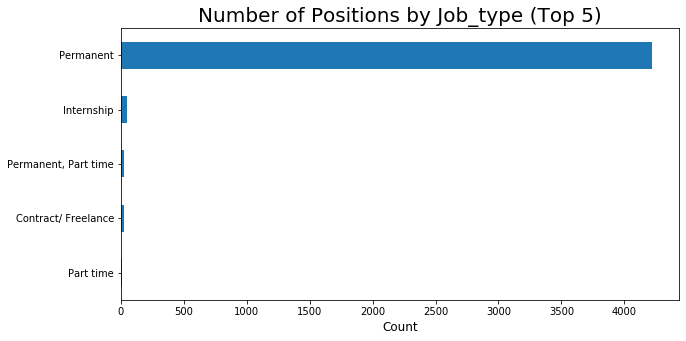

In [8]:
job_type=df[df['Type']!='Not found']
job_type = job_type.groupby(['Type']).count().sort_values('Title').tail(5)

job_type['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job_type (Top 5)', size = 20)
plt.show()

Comment: we can see that the highest number of permanent jobs provided candidates job-level as permanent

#### Position by job level

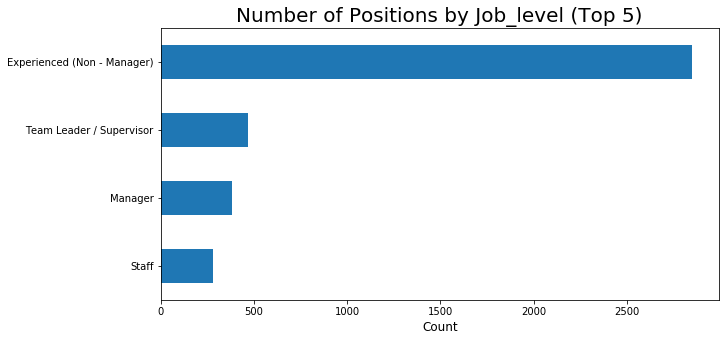

In [9]:
job_level = df.groupby(['Level']).count().sort_values('Title').tail(4)

job_level['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job_level (Top 5)', size = 20)
plt.show()

Comment: The top position by job-level required as Experience (Non-Manager)

#### Position by job experience

In [10]:
df['Experience_re']=[x.upper() for x in df['Experience_re']]

df.loc[df['Experience_re'].str.contains('FRESHER'),'Experience_re']='Entry Level'
df.loc[df['Experience_re'].str.contains('NOEXPERIENCE'),'Experience_re']='Entry Level'
df.loc[df['Experience_re'].str.contains('ENTRY'),'Experience_re']='Entry Level'
df.loc[df['Experience_re'].str.contains('STUDENT'),'Experience_re']='Entry Level'
df.loc[df['Experience_re']=='0-0YEARS', 'Experience_re'] = 'Entry Level'

df.loc[df['Experience_re'].str.contains('EXPERIENCED'),'Experience_re']='Experienced (Non-Manager)'
df.loc[df['Experience_re'].str.contains('MANAGER'),'Experience_re']='Manager'
df.loc[df['Experience_re'].str.contains('SUPERVISOR'),'Experience_re']='Manager'


df.loc[df['Experience_re']=='0-1YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='0-2YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='1-0YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='1-YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='1-2YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='1-3YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='1-4YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='-1YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='2-YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='2-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='2-0YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='-2YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='3-0YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='3-YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='-3YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='4-YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='4-YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='1-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='2-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='3-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='4-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='4-YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='5-0YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='0-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='2-3YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='2-4YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='3-4YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='4-0YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='6-0YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='-5YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='0-5 YEARS','Experience_re']='0-5 Years'
df.loc[df['Experience_re']=='-4YEARS','Experience_re']='0-5 Years'

df.loc[df['Experience_re']=='10-YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-YEARS', 'Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-9YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-YEARS', 'Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='7-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='7-YEARS', 'Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='8-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='8-9YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='10-YEARS','Experience_re']='5-10 Years'


df.loc[df['Experience_re']=='10-YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='2-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='3-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-6YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-7YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-YEARS', 'Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-8YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-9YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-YEARS', 'Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='7-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='7-YEARS', 'Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='8-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='8-9YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='10-YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='5-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='7-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='8-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='4-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='6-10YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='10-0YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='7-9YEARS','Experience_re']='5-10 Years'
df.loc[df['Experience_re']=='1-8YEARS','Experience_re']='5-10 Years'

df.loc[df['Experience_re']=='10-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='10-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='10-30YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='1-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='12-18YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='12-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='2-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='2-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='3-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='3-25YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='4-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='5-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='5-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='5-25YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='6-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='6-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='7-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='8-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='8-13YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='8-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='9-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='10-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='7-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='1-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='22-28YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='15-20YEARS','Experience_re']='Over 10 Years'

df.loc[df['Experience_re']=='3-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='8-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='7-11YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='2-14YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='7-35YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='7-20YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='8-16YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='9-15YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='5-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='1-25YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='OVER 10 YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='1-12YEARS','Experience_re']='Over 10 Years'
df.loc[df['Experience_re']=='7-25YEARS','Experience_re']='Over 10 Years'

In [11]:
df['Experience_re'].unique()

array(['0-5 Years', 'Experienced (Non-Manager)', '5-10 Years',
       'Entry Level', 'Over 10 Years', 'Manager'], dtype=object)

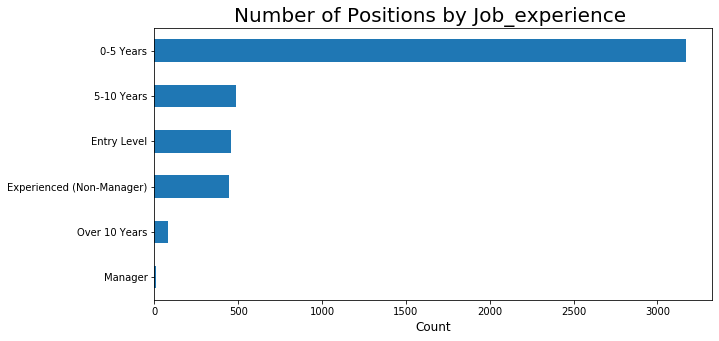

In [12]:
job_experience = df.groupby(['Experience_re']).count().sort_values('Title').head(20)

job_experience['Title'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job_experience ', size = 20)
plt.show()

Comment: We can see that the year of experience required for the field of data is arround 0-5 years that having the strongest demand 

### Text Analysis

In this section, we will focus on the Job Description/ Requirements column of the data. By using libraries like re, wordcloud, matplotlib to gain further insights on the requirements for the field of data science with the following questions:

* What are the companies looking for when hiring?
* How many years of experience do they required?
* What level of education do the companies prefer?
* What top skills they require ?
* Others (Degree requirement / Any programming request?)....

#### Word Cloud

In [13]:
# Combine the desciptions & job_title 
data_text = pd.DataFrame(df, columns=['Title','Description_re'])
data_text.head()

,Title,Description_re
0,Machine Learning Engineer,[]
1,Machine Learning Engineer,[ 'Job Details Position: AI Engineer - IT / En...
2,Machine Learning Engineer,[ 'Job Details Position: AI Engineer (On Mobil...
3,Machine Learning Engineer,[ '- Research and development of AI applicatio...
4,Machine Learning Engineer,[ '']


In [14]:
# Data Engineer  
data_engineer= data_text[data_text['Title'] == 'Data Engineer']


In [15]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction import text
stopword = set(STOPWORDS)
extra_stopword = ['br','amp','em','according to','FC','em','uf0b7','of','with','according to','related to','year','experience','to',"p'",
                 'Requirement','in','data','skills','ability','working','At-Least','development','advantage','of','knowledge','in',
                  'Understanding','At Least','Ability to','skill','the company','Other Benefits']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

In [16]:
de_words = []
for t in data_engineer['Description_re'].tolist():
    de_words+= t
de_words[:2]

['[', ']']

In [17]:
de_text = pd.Series(de_words).str.cat(sep = '')
de_text[:200]

"[][ 'Architecture Governance Solutions, Innovative Automation Solutions :, Data Science and Machine Learning (AI / ML)']['Other jobs:'][ 'Job Description :, \\ u200b \\ u200b * welfare regime, * LOCATIO"

In [18]:
# Create wordcloud
wc = WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stop_words,
    width=1600,
    height=800,
    max_font_size=200
)

In [19]:
# generate wordcloud
wc.generate(de_text)

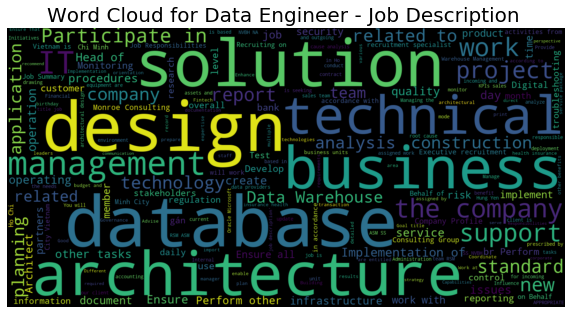

In [20]:
# display wordcloud *Data Engineer*
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Data Engineer - Job Description ', size = 20)
plt.show()

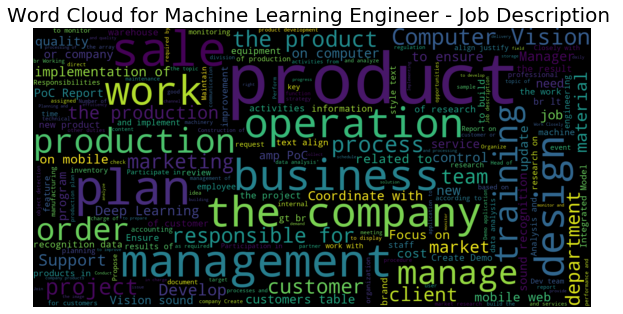

In [21]:
# Machine Learning 
machine_learning= data_text[data_text.Title == 'Machine Learning Engineer']
ml_words = []
for t in machine_learning['Description_re'].tolist():
    ml_words+= t

wc.generate(pd.Series(ml_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Machine Learning Engineer - Job Description ', size = 20)
plt.axis('off')
plt.show()

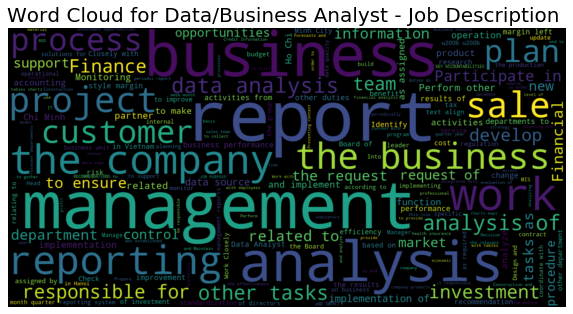

In [22]:
# Data Analyst 
data_analyst= data_text[data_text.Title == 'Data/Business Analyst']
da_words = []
for t in data_analyst['Description_re'].tolist():
    da_words+= t
    
wc.generate(pd.Series(da_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Data/Business Analyst - Job Description ', size = 20)
plt.axis('off')
plt.show()

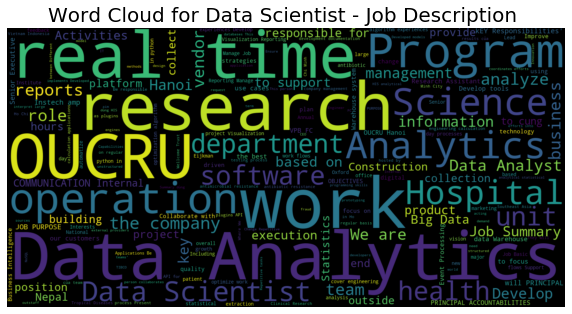

In [23]:
# Data Scientist
data_analyst= data_text[data_text.Title == 'Data Scientist']
da_words = []
for t in data_analyst['Description_re'].tolist():
    da_words+= t
    
wc.generate(pd.Series(da_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Data Scientist - Job Description ', size = 20)
plt.axis('off')
plt.show()

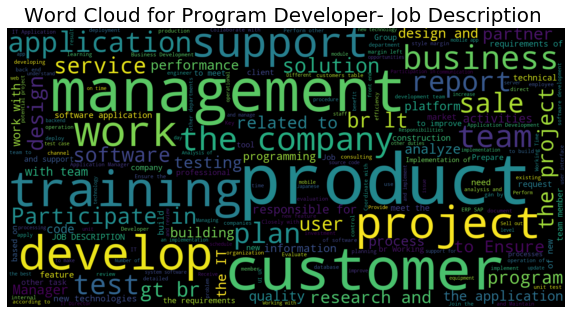

In [24]:
# Program Developer
data_analyst= data_text[data_text.Title == 'Program Developer']
da_words = []
for t in data_analyst['Description_re'].tolist():
    da_words+= t
    
wc.generate(pd.Series(da_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Program Developer- Job Description ', size = 20)
plt.axis('off')
plt.show()

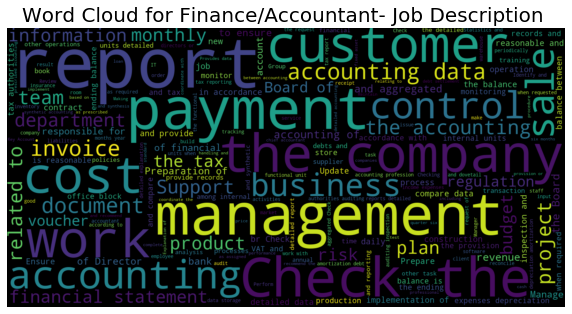

In [25]:
# Finance 
data_analyst= data_text[data_text.Title == 'Finance/Accountant']
da_words = []
for t in data_analyst['Description_re'].tolist():
    da_words+= t
    
wc.generate(pd.Series(da_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Finance/Accountant- Job Description ', size = 20)
plt.axis('off')
plt.show()

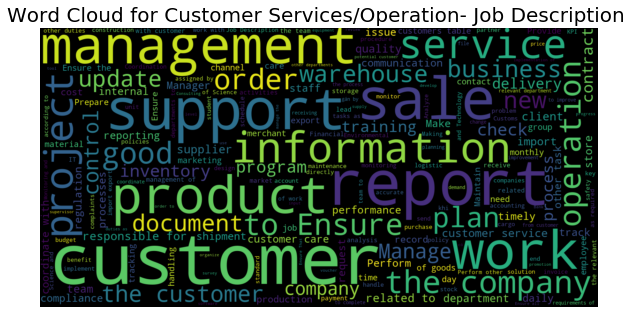

In [26]:
# CS/OPERATION
cs= data_text[data_text.Title == 'Customer Services/Operation']
cs_words = []
for t in cs['Description_re'].tolist():
    cs_words+= t

wc.generate(pd.Series(cs_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Customer Services/Operation- Job Description ', size = 20)
plt.axis('off')
plt.show()

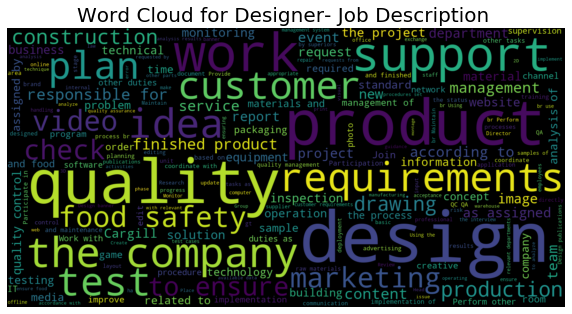

In [27]:
# Design
design= data_text[data_text.Title == 'Designer']
d_words = []
for t in design['Description_re'].tolist():
    d_words+= t
    
wc.generate(pd.Series(d_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Designer- Job Description ', size = 20)
plt.axis('off')
plt.show()

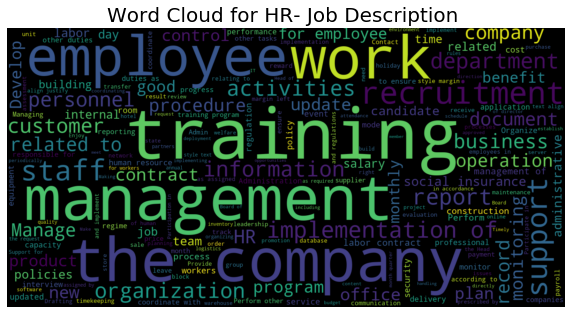

In [28]:
# HR
hr= data_text[data_text.Title == 'HR']
hr_words = []
for t in hr['Description_re'].tolist():
    hr_words+= t
wc.generate(pd.Series(hr_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for HR- Job Description ', size = 20)
plt.axis('off')
plt.show()

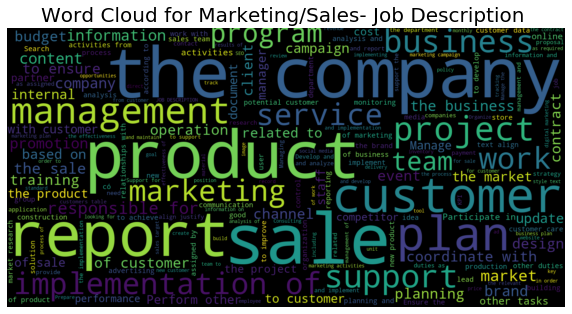

In [29]:
#'Marketing/Sales
mk= data_text[data_text.Title == 'Marketing/Sales']
mk_words = []
for t in mk['Description_re'].tolist():
    mk_words+= t
    
wc.generate(pd.Series(mk_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Marketing/Sales- Job Description ', size = 20)
plt.axis('off')
plt.show()

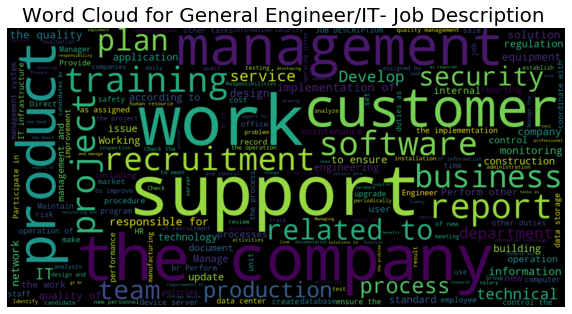

In [30]:
#General Engineer/IT
it= data_text[data_text.Title == 'General Engineer/IT']
it_words = []
for t in it['Description_re'].tolist():
    it_words+= t
    
wc.generate(pd.Series(it_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for General Engineer/IT- Job Description ', size = 20)
plt.axis('off')
plt.show()

In [31]:
# Word Clound Benefits for data field (except Others )
data_benefit=pd.DataFrame(df,columns=['Title','Benefit_re'])
data_benefit.head()

,Title,Benefit_re
0,Machine Learning Engineer,"[' Laptop', ' Insurance', ' Travel', ' Allowan..."
1,Machine Learning Engineer,"[' Insurance', ' Travel', ' Salary review']"
2,Machine Learning Engineer,"[' Insurance', ' Training Scheme', ' Salary re..."
3,Machine Learning Engineer,"[' Laptop', ' Insurance', ' Travel', ' Allowan..."
4,Machine Learning Engineer,"[' Insurance', ' Travel', ' Incentive bonus', ..."


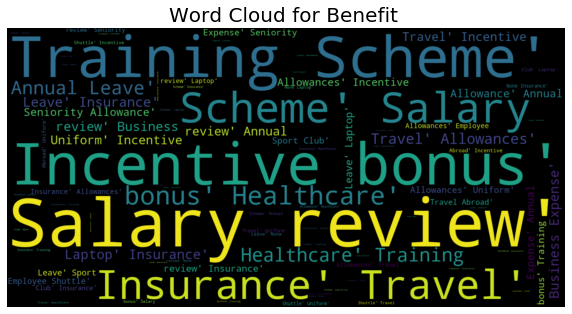

In [32]:
be= data_benefit[data_benefit.Title !='Others']
be_words = []
for t in be['Benefit_re'].tolist():
    be_words+= t
    
wc.generate(pd.Series(be_words).str.cat(sep = ''))

plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Benefit ', size = 20)
plt.axis('off')
plt.show()

Here are some explaination after doing word_cloud:

* Data Engineering: in charge of database, master data, data management, support operation to the company 
* Machine Learning: in charge of doing project, product, report for the company
* Data Analyst: requires analyst, report data, doing project/performance 
* Data Scientist: design models, data anlytics, doing research, drive performance for the company 
* Program Developer: develop data software, design/test product & application 
* Finance/Accounting: support management, control cost, do data report, accouting for the company
* CS/Operation: work on report/business projects, offer customer services/operations  
* Design: design products, video, creative ideas, do marketing also 
* HR: in charge of recruitment, training, orders, work on regulation for the company 
* Marketing/Sales: responsible for sales report, customer managements, follow up performance/market/business 
* General Engineer/IT: process network, product operation, control project/equipments 
* Benefit: generally, the company offers Scheme' salary, anaual leave, salary review, incentive bonus, training scheme, insurance to attract candidates 


#### Skill Requirement 

In [51]:
df = data.copy()
text = df['Requirement_re'].values + df['Description_re'].values
type(text)

numpy.ndarray

In [52]:
# Create a regex search function
def count_text(patt,text):
    pattern = re.compile(patt)
    count = 0
    for t in text:
        if pattern.search(t):
            count+=1
    return count

In [53]:
# Create a data frame with skills name and regex pattern to search with
skills = ['R','Python','Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS','Algorithm','Java','Visualization']

skill_patt = ['\WR\W+\s*','(?i)\WPython\W','(?i)\WHadoop\W?','(?i)SQL\w*','(?i)\WTableau\W?',
              "(?i)\WTensorFlow\W?","(?i)\WAgile\W?","(?i)\WPower\s?BI\W?",
             "(?i)\WSSAS\W?","(?i)\WAlgorithms?\W?",'(?i)Java\w*','(?i)\WVisualization\W?']

skill_df =pd.DataFrame(
    {"skill": skills,
     "regex_pattern":skill_patt})

In [54]:
# Iterate through the list of skill using the search function created
i = []
for x in skill_df['regex_pattern']:
    i.append(count_text(x,text))
skill_df['count'] = i
skill_df['ptg'] = round(skill_df['count']/len(text),2)
skill_df



,skill,regex_pattern,count,ptg
0,R,\WR\W+\s*,96,0.02
1,Python,(?i)\WPython\W,148,0.03
2,Hadoop,(?i)\WHadoop\W?,24,0.01
3,SQL,(?i)SQL\w*,308,0.06
4,Tableau,(?i)\WTableau\W?,15,0.00
5,TensorFlow,(?i)\WTensorFlow\W?,50,0.01
6,Agile,(?i)\WAgile\W?,171,0.04
7,Power BI,(?i)\WPower\s?BI\W?,54,0.01
8,SSaS,(?i)\WSSAS\W?,0,0.00
9,Algorithm,(?i)\WAlgorithms?\W?,100,0.02


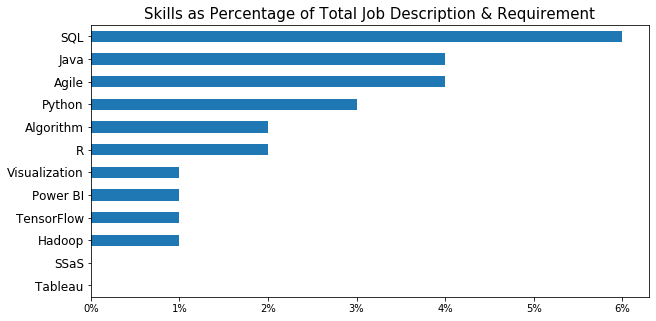

In [62]:
x = skill_df.sort_values(by = 'ptg')
ax =x['ptg'].plot(kind = "barh",figsize = (10,5))
ax.set_title('Skills as Percentage of Total Job Description & Requirement', size = 15)
ax.set_yticklabels(x['skill'], size = 12)
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
plt.show()

#### Degree Requirement

In [72]:
# Define regex pattern and seach for PhD
pattern = re.compile("(?i)\WBachelor?'?s?\W")
pattern2 = re.compile('(?i)\WBachelor\W')
count = 0
for t in text:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree = {"Bachelor": count}

In [73]:
# Define regex pattern and seach for Master 
pattern = re.compile("(?i)\WMasters?'?s?\W")
pattern2 = re.compile('(?i)\WM.?S\W')
count = 0
for t in text:
    if pattern.search(t):
        count +=1
    elif pattern2.search(t):
        count +=1
degree.update({"Master":count})

In [74]:
degree = pd.DataFrame.from_dict(degree,orient='index',
                       columns=[ 'count'])
degree['ptg'] = degree['count']/len(text)

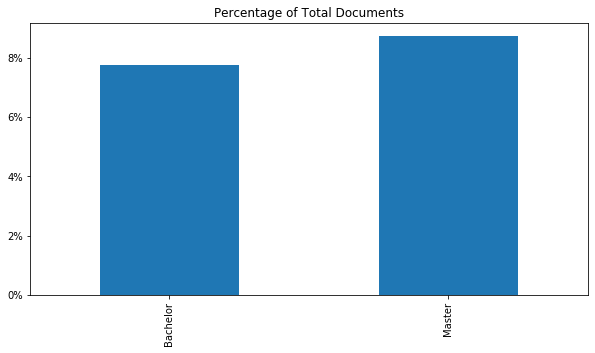

In [75]:
ax =degree['ptg'].plot(kind = "bar", figsize =(10,5))
ax.set_title('Percentage of Total Documents')
ax.set_xticklabels(degree.index)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

## Conclution 
This project provided me with valuable insights on what the companies in Vietnam are looking for in candidates, who are seeking for data position. There are some pros and coins as follows:

#### Benefits: 
* Learn some domain knowledge in HR to assign timeline for year of experience analyst (0-5 years, 5-10 years...) 
* How to handle text (group Job title/Year of experience
* Learn & practise on data visulization & text analyst (Word Cloud) 

#### Challenges:
* Data might not cover for the whole picture (just get data from 1 website in Mar 2021) 
* Human input might lead to messy data that take a lot of time to clean up & might impact on Word Cloud results

#### What can I improve ?
* Code is quite long, may try to use function to make it tidy 
* The benefit might differ from each job catergories that we can consider to split it out for futher analyst 
* Can have a big project to get data from other famous sources (Vietnamwork, IT Viec...) to get the whole picture of current VN Job Market & try Big Data projects 
* May extend this project to other specific fields (Banking/Finance or Logistics Supply Chain) to support graduates 